<a href="https://colab.research.google.com/github/rubyvanrooyen/radio-astronomy-for-beginners/blob/master/FFTconcepts/Waves_as_a_Sum_of_Cosines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pylab as plt
import numpy as np
import time 
from IPython.display import clear_output
from IPython.display import display
# from IPython.core.display import clear_output
# from IPython.core.display import display

# Approximating a square wave function as a sum of sines

Build a square wave by adding up sucessive sine waves (of specific frequency and amplitude).

First: set up the x-values for the function

In [17]:
x = np.arange(-np.pi, np.pi, 0.01) 

Followed by successively add up a series of sine waves.   
Note: as you add more sine waves, with increasing frequencies, the better the approximation of a square wave

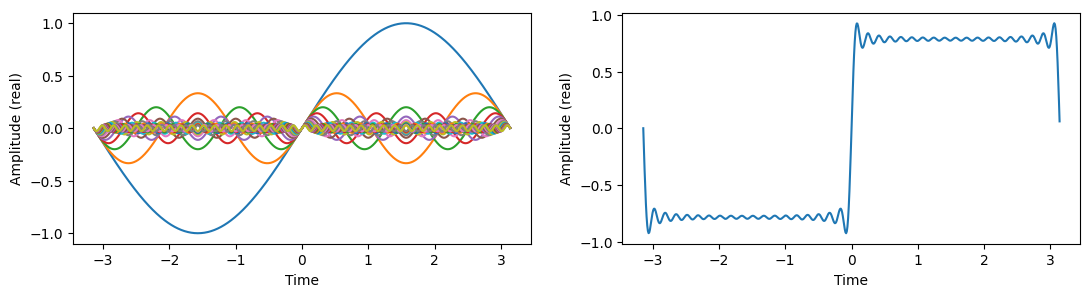

In [18]:
# create plot
f, ax = plt.subplots(nrows=1,ncols=2,
                     figsize=[13,3],
                     facecolor='white')

# set maximum number of iterations
i_max = 20

# initialise values
sqwave = 0.0
b = 1.0

# for each iteration...
for i in range(1,i_max):
    # new component   
    component = (1/b)*np.sin(b*x)
    # add that component to our existing wave
    sqwave = sqwave+component
    
    # plot the new component on the left, the sum on the right
    ax[0].plot(x,component)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude (real)')
    
    ax[1].plot(x,sqwave)
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Amplitude (real)')
    
    # iterate
    b=b+2

    # show the plot, then get ready for the next plot
    plt.draw()
    time.sleep(2.0)
    clear_output(wait=True)
    display(f)
    ax[1].cla()
    
plt.close()

# Approximating a triangular wave function
More complex construction of triangular wave using the sum of both sine and cosine functions.

First: set up the x-values for the function

In [19]:
# create list of x values
x = np.arange(-np.pi, np.pi, 0.01) 

List the frequencies and amplitudes to build up the traingular wave.   
Note the complex amplitude values

In [12]:
freqs = np.arange(1.0, 20., 2.)
Cn = np.array([(3.46565342017 - 254.737095318j),
               (-1.16644367406 + 28.4709770497j),
               (0.685571832259 - 10.0922164294j),
               (-0.504127833607 + 5.240586586j),
               (0.376217427242 - 3.07367121897j),
               (-0.323123561657 + 2.1187342583j),
               (0.256920499162 - 1.44821668795j),
               (-0.238383315852 + 1.1331307276j),
               (0.193524671284 - 0.829332009977j),
               (-0.189110706279 + 0.69953977579j)])

Successively addition of the sine and cosine waves.   
Adding increasing frequencies will again provide a better approximation of the triangular wave

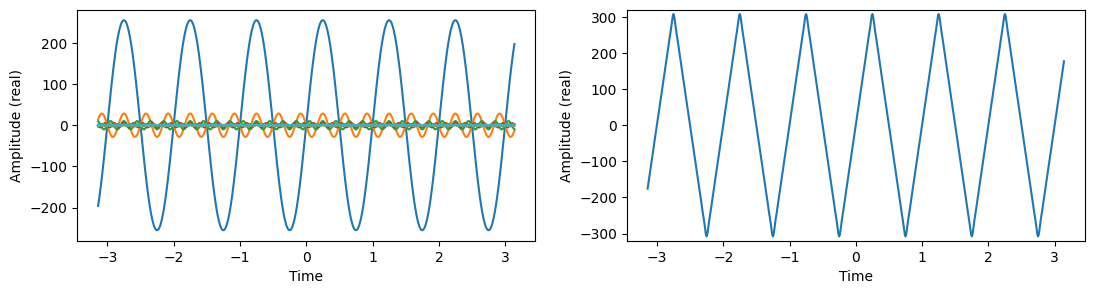

In [13]:
# create plot
f, ax = plt.subplots(nrows=1, ncols=2,
                     figsize=[13,3],
                     facecolor='white')

# set maximum number of iterations
i_max = 20

# initialise our function
wave = 0.0

# for each iteration...
for i in range(0,len(Cn)):
    # new component   
    wave_amp = Cn[i]
    wave_freq = freqs[i]
    component = wave_amp*np.cos(2.*np.pi*x*wave_freq) \
              + 1.0j*wave_amp*np.sin(2.*np.pi*x*wave_freq) 
    
    # add that component to our existing wave
    wave = wave+component
    
    # plot the new component on the left, the sum on the right
    ax[0].plot(x,component.real)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude (real)')

    ax[1].plot(x,wave.real)
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Amplitude (real)')
    ax[1].set_ylim(-320,320)
    
    # show the plot, then get ready for the next plot
    plt.draw()
    time.sleep(2.0)
    clear_output(wait=True)
    display(f)
    ax[1].cla()
    
plt.close()

# The components from a triangular wave
The frequencies and amplitudes of the sine and cosine functions used to build up the triangle function

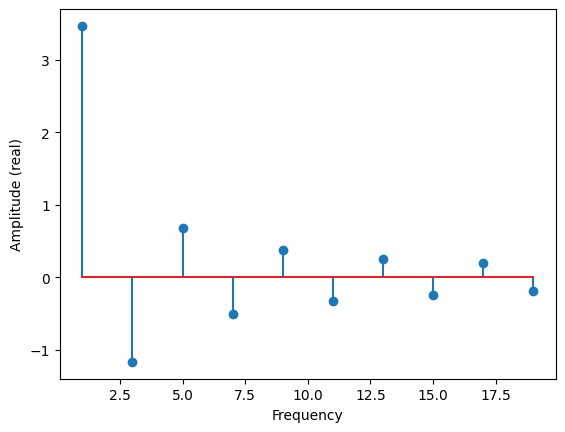

In [14]:
plt.figure(facecolor='white')
plt.stem(freqs, Cn.real) # use_line_collection=True)
plt.xlabel('Frequency')
plt.ylabel('Amplitude (real)')
plt.show()

The triangle function can be approximated by the sum of a series of functions:

$$C_n \cos(2\pi t f) + i \; C_n \sin(2\pi t f)$$ 

These are called the harmonics of the triangle function.

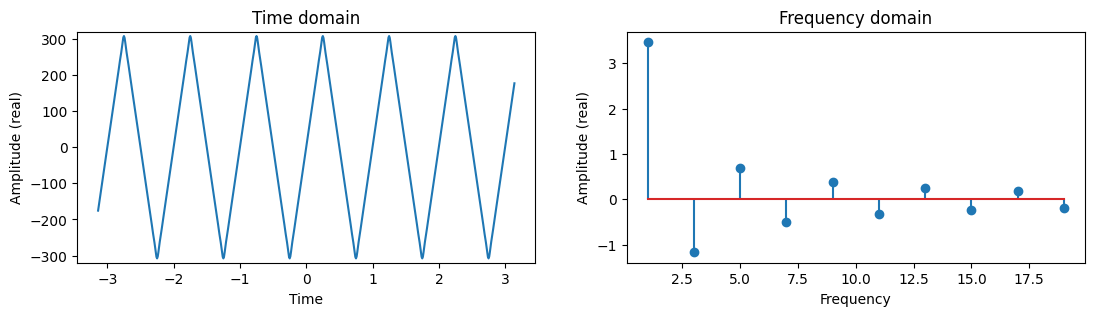

In [20]:
# create plot
f, ax = plt.subplots(nrows=1, ncols=2,
                     figsize=[13,3],
                     facecolor='white')

# triangle function
ax[0].plot(x, wave.real)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude (real)')
ax[0].set_ylim(-320,320)
ax[0].set_title('Time domain')

# harmonics
ax[1].stem(freqs, Cn.real) #, use_line_collection=True)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Amplitude (real)')
ax[1].set_title('Frequency domain')

plt.show()